# Notebook 31: Sampling galaxies from the GSMF

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.integrate import quad
from scipy.optimize import fsolve

import sys
sys.path.append('../src/')
from imf import GSMF
from constants import CHR19_GSMF, ZOH_SUN

In [3]:
LN10 = np.log(10)
LOGE = np.log10(np.e)

In [4]:
logm_max = 12
logm_min = 7

#### The Galaxy Stellar Mass Function

In [5]:
zs = np.arange(0,11,1)
logMs = np.linspace(logm_min, logm_max, 100)

logPhis_list = list()
for z in np.arange(0,11,1):
    gsmf = GSMF(z)
    logPhis = np.array([gsmf.gsmf(logm) for logm in logMs])
    logPhis_list.append(logPhis)

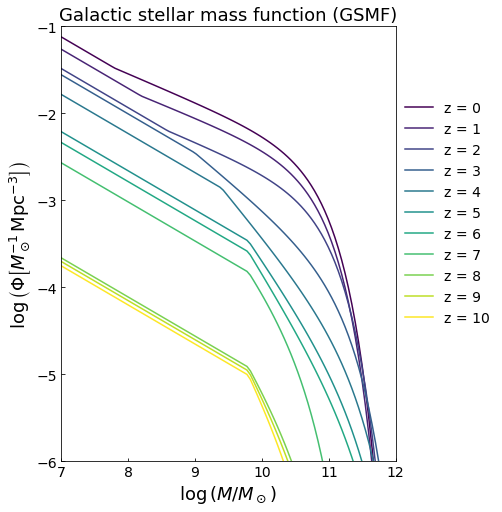

In [6]:
gsmf_plotmax = -1
gsmf_plotmin = -6

fig, ax = plt.subplots(figsize=(6,8))
cnorm = zs.max() - zs.min()

for z, logPhis in zip(zs, logPhis_list):
    color = cm.viridis((z-zs.min())/cnorm)
    ax.plot(logMs, logPhis, '-', c=color, label=f'z = {z}')

ax.set_xlim(logMs.min(), logMs.max())
ax.set_ylim(gsmf_plotmin, gsmf_plotmax)
ax.tick_params(axis='both', direction='in', labelsize=14)

ax.set_xlabel(r'$\log\left(M/M_\odot\right)$', fontsize=18)
ax.set_ylabel(r'$\log\left(\Phi\left[M_\odot^{-1}\,\mathrm{Mpc}^{-3}\right]\right)$', fontsize=18)
ax.set_title('Galactic stellar mass function (GSMF)', fontsize=18)
ax.legend(loc=(1.01, 0.3), frameon=False, fontsize=14)

## Sampling masses from the GSMF

In [7]:
from sampling import GSMFSampling

In [8]:
module_test_zs = np.arange(0.01,11,1)
module_test_logmmin = 7
module_test_logmmax = 12
module_test_nbins = 5

In [10]:
sampling = 'number'
module_test_sampler_list = list()
module_test_gsmf_list = list()

for module_test_z in module_test_zs:
    module_test_gsmf = GSMF(module_test_z)
    module_test_sampler = GSMFSampling(module_test_gsmf, module_test_logmmin, module_test_logmmax, module_test_nbins, sampling)
    module_test_sampler.sample()
    module_test_gsmf_list.append(module_test_gsmf)
    module_test_sampler_list.append(module_test_sampler)

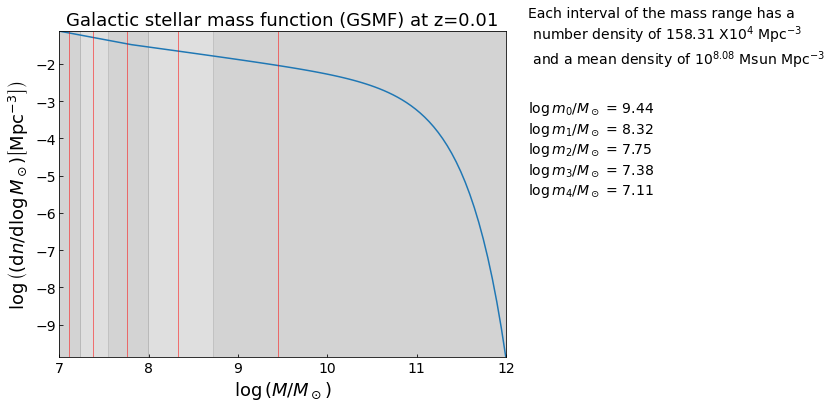

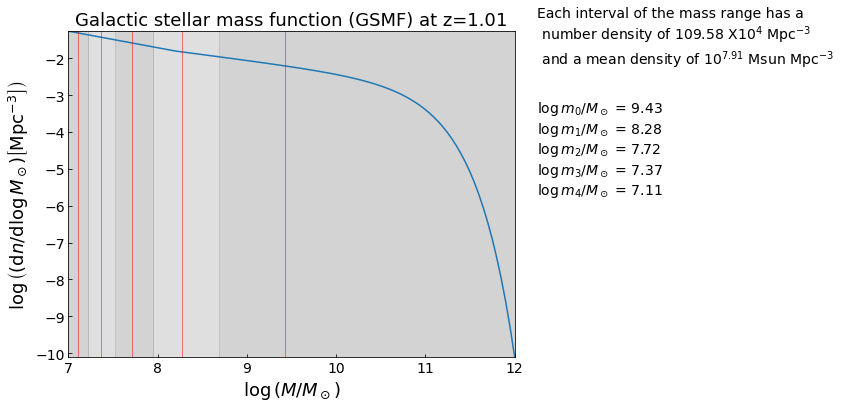

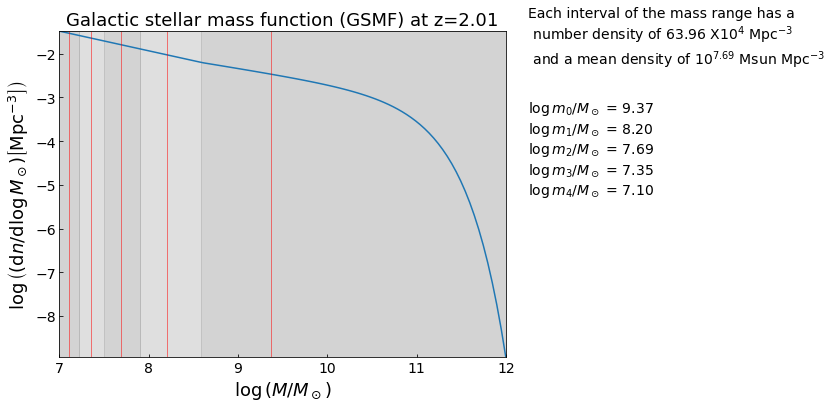

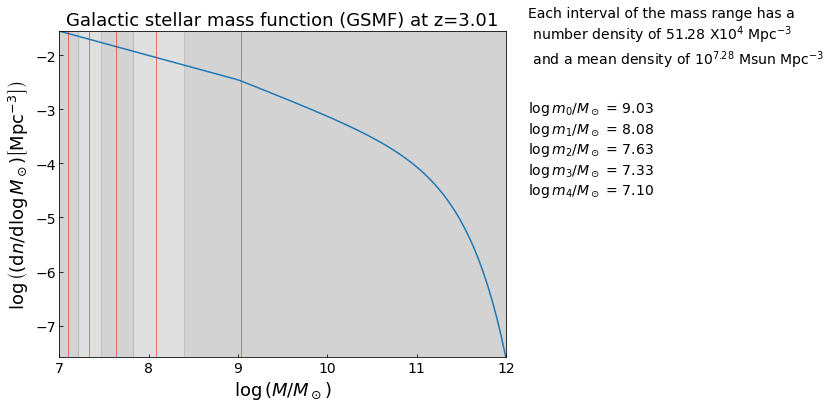

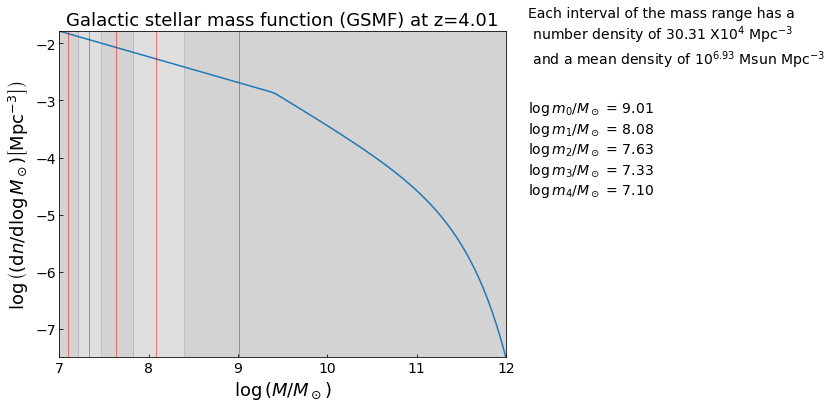

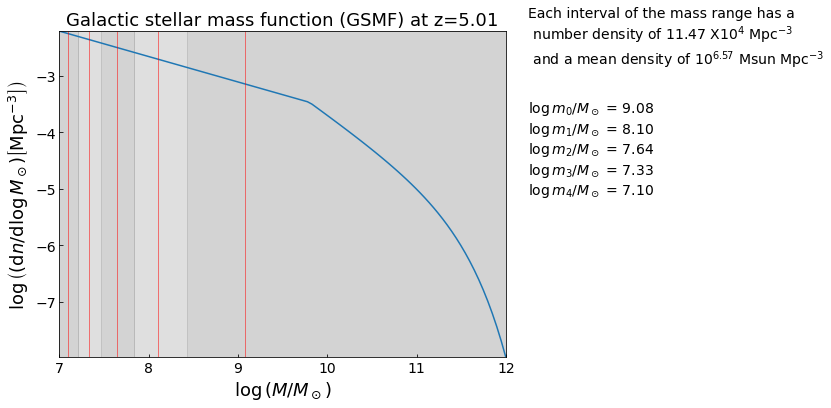

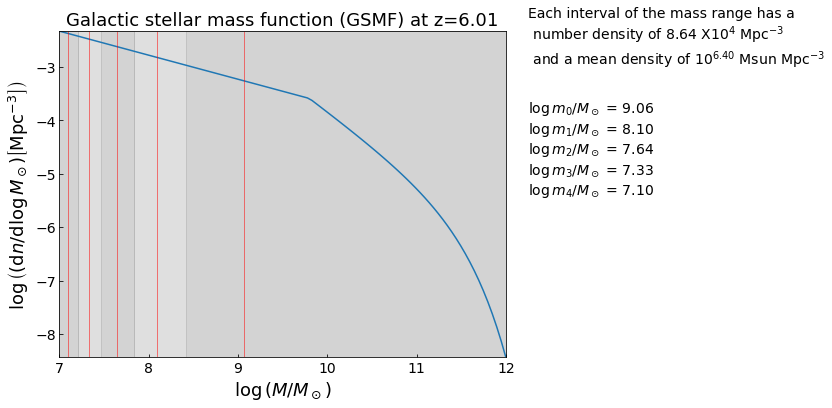

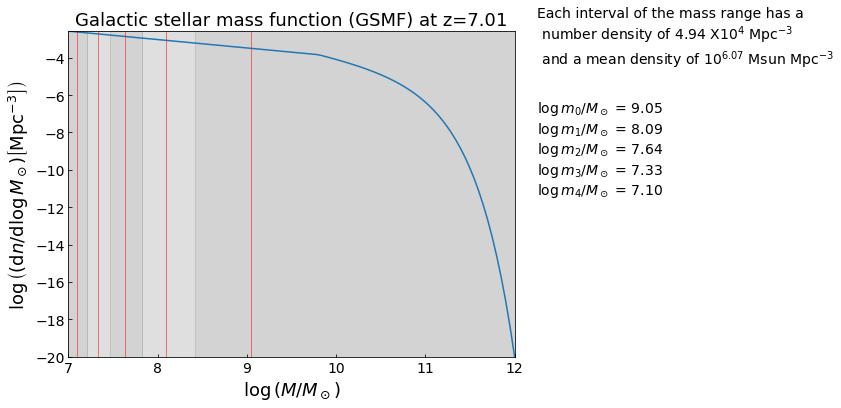

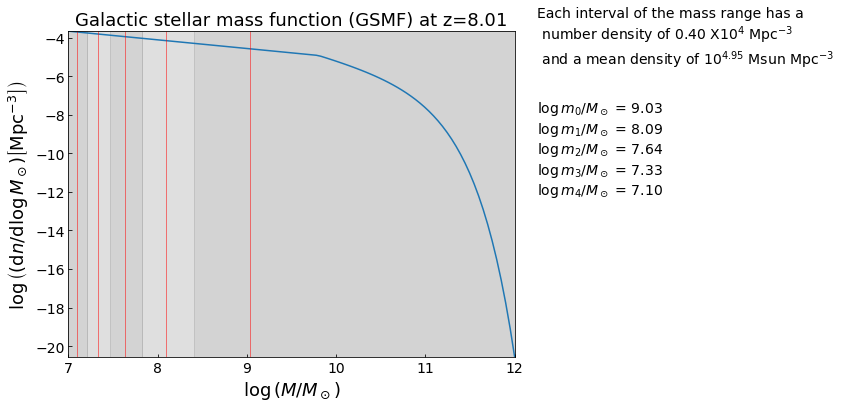

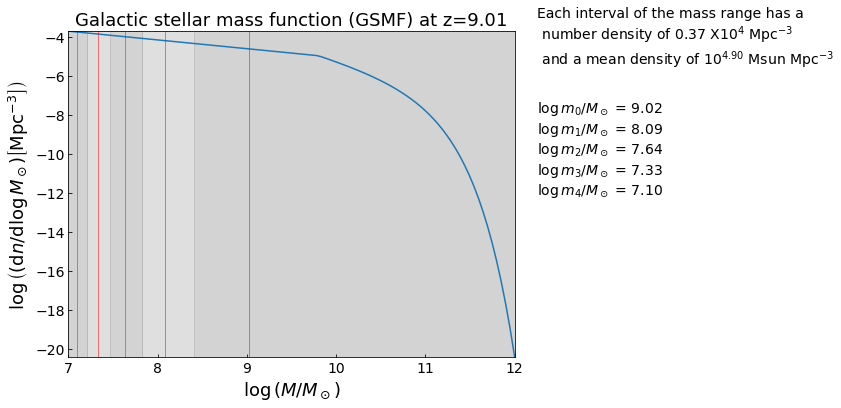

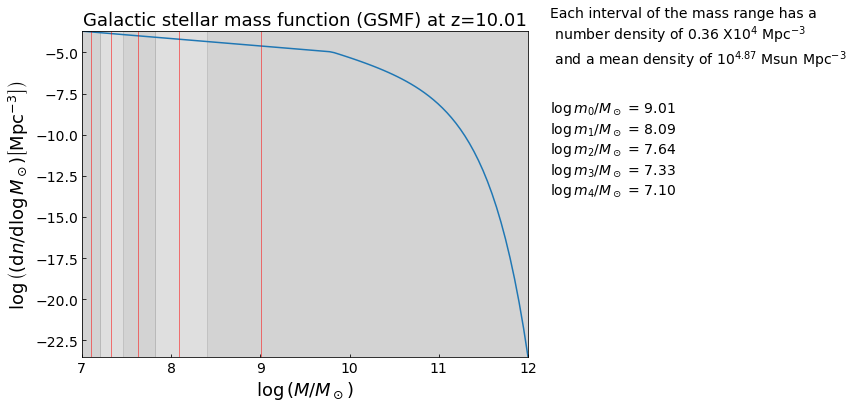

In [11]:
for module_test_z, module_test_gsmf, module_test_sampler in zip(module_test_zs, module_test_gsmf_list, module_test_sampler_list):
    ndensity = np.mean(module_test_sampler.grid_ndensity_array[0])
    density = np.mean(module_test_sampler.grid_density_array[0])
    bin_limits = module_test_sampler.bin_limits
    grid_masses = module_test_sampler.grid_logmasses

    testplot_logms = np.linspace(module_test_logmmin, module_test_logmmax, 100)
    testplot_gsmfs = np.array([module_test_gsmf.gsmf(logm) for logm in testplot_logms])
        
    fig, ax = plt.subplots(figsize=(8,6))

    ax.plot(testplot_logms, testplot_gsmfs)

    for i, (limit1, limit2) in enumerate(zip(bin_limits[:-1], bin_limits[1:])):
        c = 'darkgray'
        if i%2:
            c  = 'silver'
        ax.axvspan(limit1, limit2, alpha=0.5, color=c)
    
    for mass in grid_masses:
        ax.vlines(mass, testplot_gsmfs.min(), testplot_gsmfs.max(), color='r', lw=0.5)

    ax.set_xlim(module_test_logmmin, module_test_logmmax)
    ax.set_ylim(testplot_gsmfs.min(), testplot_gsmfs.max())
    ax.tick_params(axis='both', direction='in', labelsize=14)

    ax.set_xlabel(r'$\log\left(M/M_\odot\right)$', fontsize=18)
    ax.set_ylabel(r'$\log\left(\left(\mathrm{d}n/\mathrm{d}\log M_\odot\right)\left[\mathrm{Mpc}^{-3}\right]\right)$', fontsize=18)
    ax.set_title(f'Galactic stellar mass function (GSMF) at z={module_test_z}', fontsize=18)
    
    if sample_by_number_density:
        descr = 'Each interval of the mass range has a \n number density of %.2f X$10^4$ Mpc$^{-3}$ \n and a mean density of $10^{%.2f}$ Msun Mpc$^{-3}$' % (1e4*ndensity, np.log10(density))
    else:
        descr = 'Each interval of the mass range has a \n total density of $10^{%.2f}$ Msun Mpc$^{-3}$ \n and a mean number density of %.2f Msun Mpc$^{-3}$' % (np.log10(density), ndensity)
    masses_descr = [f'$\log m_{i}/M_\odot$ = {m:.2f}' for i,m in enumerate(grid_masses)]
    masses_str = '\n'.join(masses_descr)
    ax.text(1.05, 0.9, descr, transform=ax.transAxes, fontsize=14)
    ax.text(1.05, 0.5, masses_str, transform=ax.transAxes, fontsize=14)

In [18]:
sample_by_number_density = False
module_test_sampler_list2 = list()
module_test_gsmf_list2 = list()

for module_test_z in module_test_zs:
    module_test_gsmf = GSMF(module_test_z)
    module_test_sampler = GSMFSampling(module_test_gsmf, module_test_logmmin, module_test_logmmax, module_test_nbins, sample_by_number_density)
    module_test_sampler.sample()
    module_test_gsmf_list2.append(module_test_gsmf)
    module_test_sampler_list2.append(module_test_sampler)

0.01 [7.39547504255859, 7.395475042555817, 7.395475042555435, 7.395475042561234, 7.3954750425673845]
1.01 [7.229784071940219, 7.229784071940708, 7.229784071929501, 7.229784071953391, 7.22978407197422]
2.01 [7.002046924533848, 7.002046923631046, 7.002046924488819, 7.002046923994558, 7.002046923843613]
3.01 [6.606279738133471, 6.606279741785452, 6.606279740669529, 6.606279741189829, 6.606279741515897]
4.01 [6.2633567509225765, 6.263356745455543, 6.26335673671453, 6.263356740204098, 6.2633567359290145]
5.01 [5.897935622978632, 5.897935622966301, 5.897935622933463, 5.897935622927026, 5.897935622933037]
6.01 [5.729415972243628, 5.729415972244628, 5.729415972211987, 5.729415972214422, 5.729415972160113]
7.01 [5.410810743652938, 5.410810743910831, 5.41081074379089, 5.410810743696061, 5.410810743697188]
8.01 [4.287476927391557, 4.287476927404028, 4.287476927400921, 4.287476927386108, 4.287476927428299]
9.01 [4.2395470216138715, 4.239547021096693, 4.239547020769273, 4.2395470202010745, 4.239547

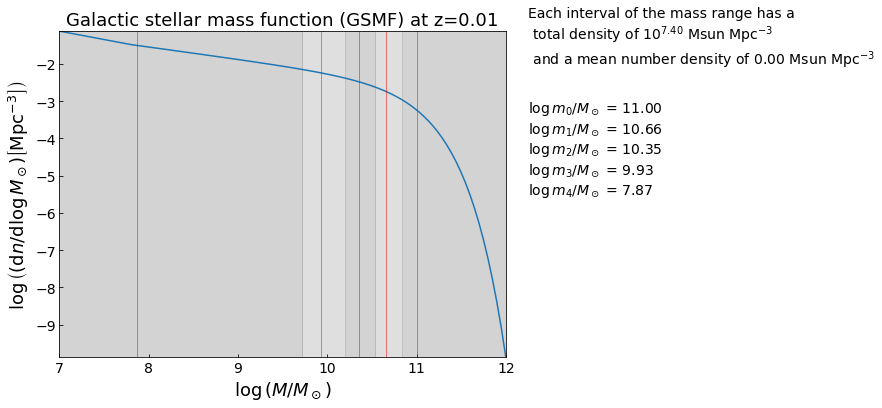

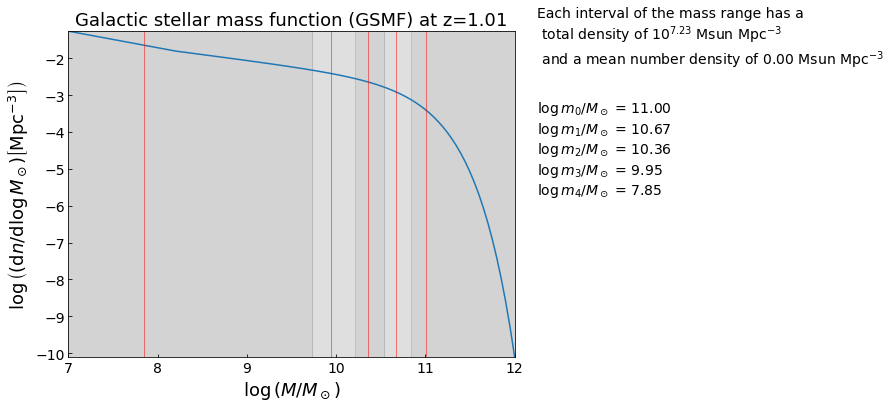

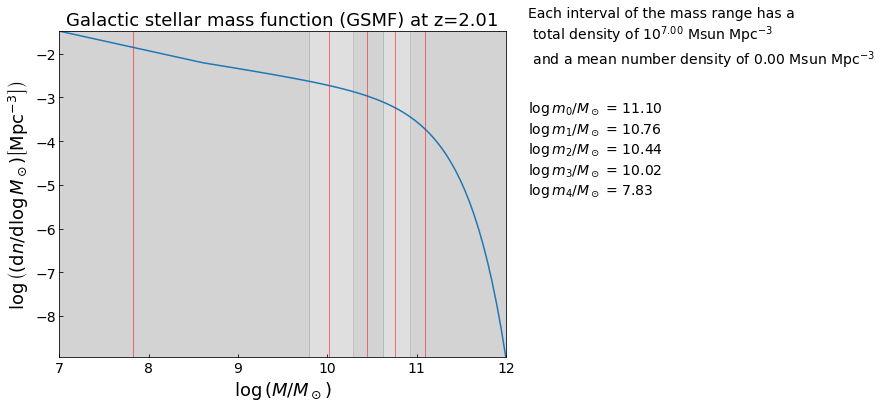

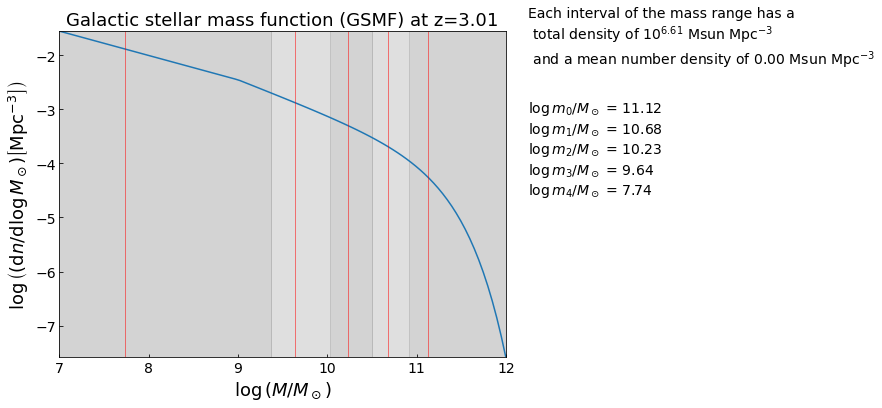

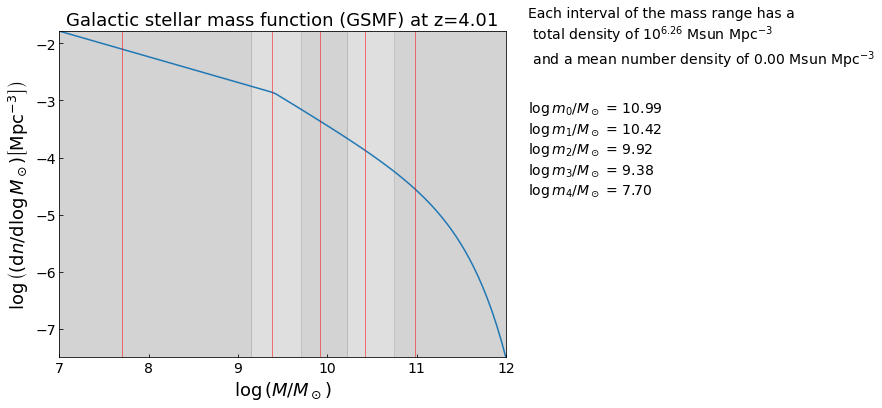

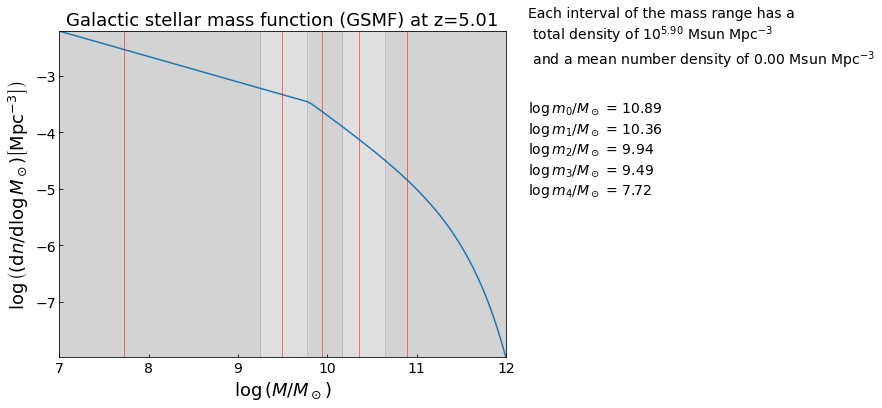

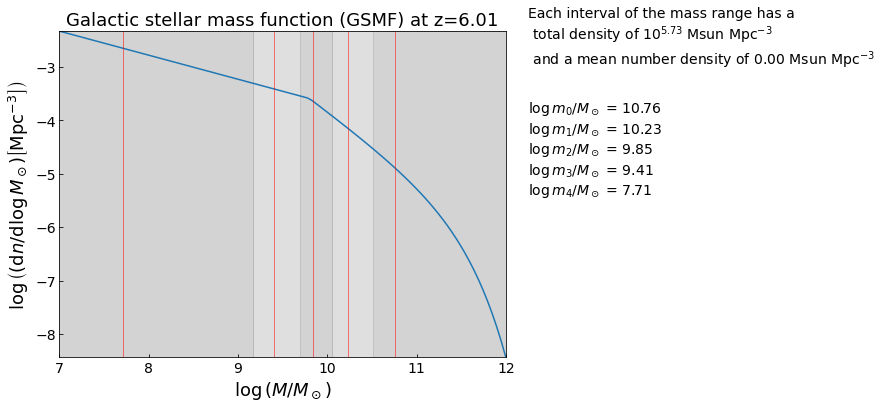

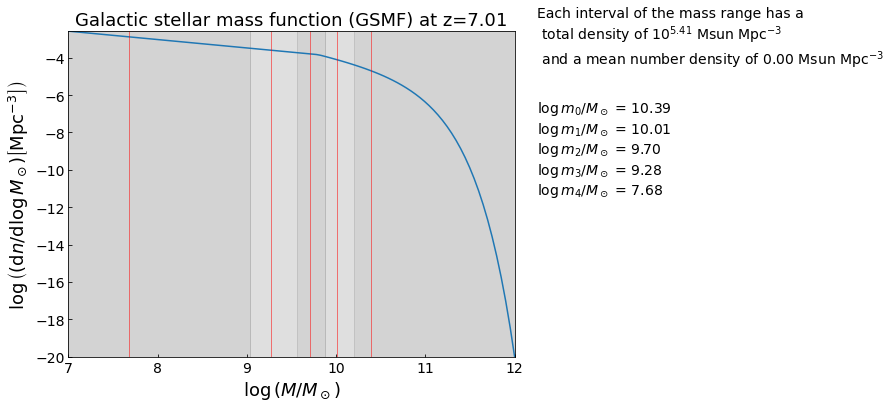

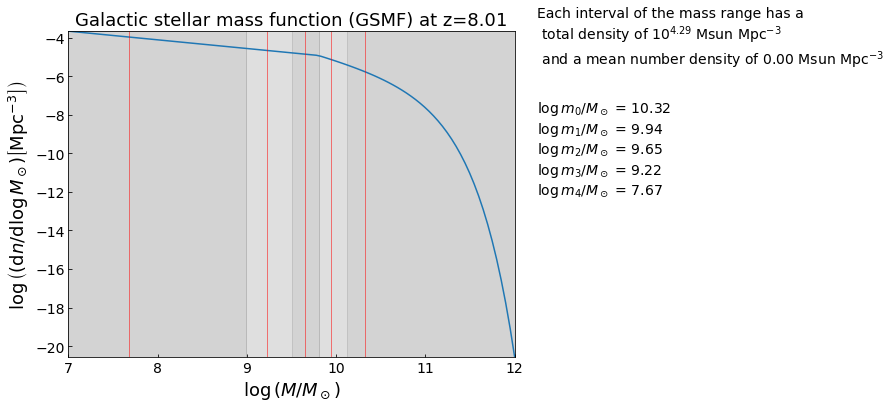

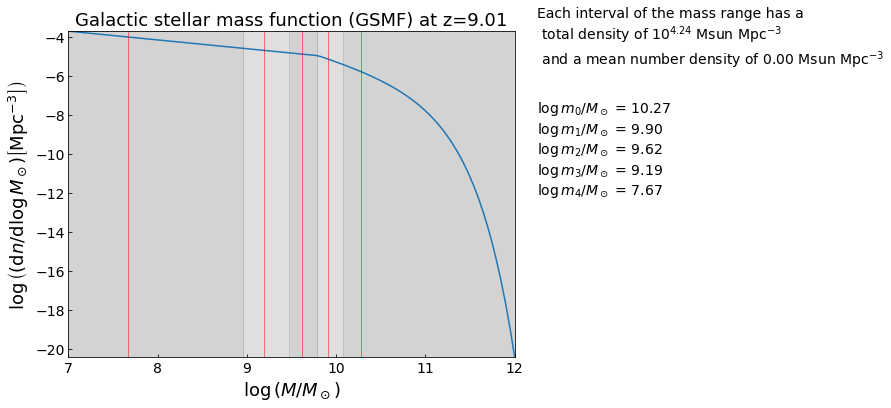

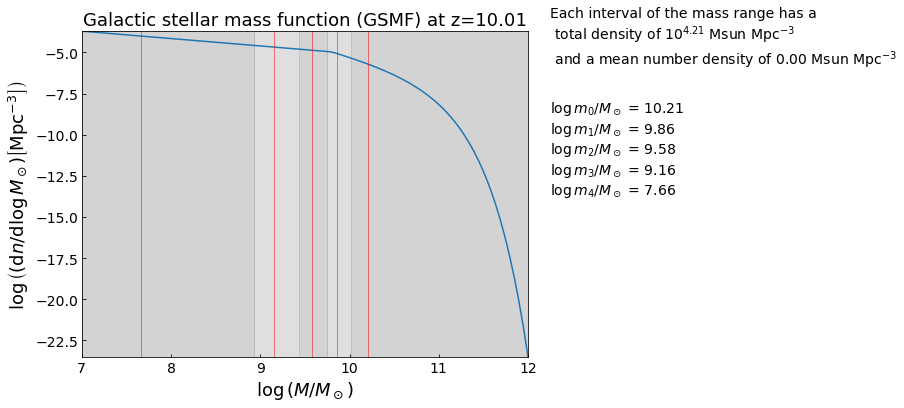

In [19]:
for module_test_z, module_test_gsmf, module_test_sampler in zip(module_test_zs, module_test_gsmf_list2, module_test_sampler_list2):
    ndensity = np.mean(module_test_sampler.grid_ndensity_array[0])
    density = np.mean(module_test_sampler.grid_density_array[0])
    bin_limits = module_test_sampler.bin_limits
    grid_masses = module_test_sampler.grid_logmasses

    testplot_logms = np.linspace(module_test_logmmin, module_test_logmmax, 100)
    testplot_gsmfs = np.array([module_test_gsmf.gsmf(logm) for logm in testplot_logms])
        
    fig, ax = plt.subplots(figsize=(8,6))

    ax.plot(testplot_logms, testplot_gsmfs)

    for i, (limit1, limit2) in enumerate(zip(bin_limits[:-1], bin_limits[1:])):
        c = 'darkgray'
        if i%2:
            c  = 'silver'
        ax.axvspan(limit1, limit2, alpha=0.5, color=c)
    
    for mass in grid_masses:
        ax.vlines(mass, testplot_gsmfs.min(), testplot_gsmfs.max(), color='r', lw=0.5)

    ax.set_xlim(module_test_logmmin, module_test_logmmax)
    ax.set_ylim(testplot_gsmfs.min(), testplot_gsmfs.max())
    ax.tick_params(axis='both', direction='in', labelsize=14)

    ax.set_xlabel(r'$\log\left(M/M_\odot\right)$', fontsize=18)
    ax.set_ylabel(r'$\log\left(\left(\mathrm{d}n/\mathrm{d}\log M_\odot\right)\left[\mathrm{Mpc}^{-3}\right]\right)$', fontsize=18)
    ax.set_title(f'Galactic stellar mass function (GSMF) at z={module_test_z}', fontsize=18)
    
    if sample_by_number_density:
        descr = 'Each interval of the mass range has a \n number density of %.2f X$10^3$ Mpc$^{-3}$ \n and a mean density of $10^{%.2f}$ Msun Mpc$^{-3}$' % (1e3*ndensity, np.log10(density))
    else:
        descr = 'Each interval of the mass range has a \n total density of $10^{%.2f}$ Msun Mpc$^{-3}$ \n and a mean number density of %.2f Msun Mpc$^{-3}$' % (np.log10(density), ndensity)
    masses_descr = [f'$\log m_{i}/M_\odot$ = {m:.2f}' for i,m in enumerate(grid_masses)]
    masses_str = '\n'.join(masses_descr)
    ax.text(1.05, 0.9, descr, transform=ax.transAxes, fontsize=14)
    ax.text(1.05, 0.5, masses_str, transform=ax.transAxes, fontsize=14)
    print(module_test_z, [np.log10(x) for x in module_test_sampler.grid_density_array])

In [13]:
sampling_mode = 'uniform'
module_test_sampler_list3 = list()
module_test_gsmf_list3 = list()

for module_test_z in module_test_zs:
    module_test_gsmf = GSMF(module_test_z)
    module_test_sampler = GSMFSampling(module_test_gsmf, module_test_logmmin, module_test_logmmax, 64, sampling_mode)
    module_test_sampler.sample()
    module_test_gsmf_list3.append(module_test_gsmf)
    module_test_sampler_list3.append(module_test_sampler)

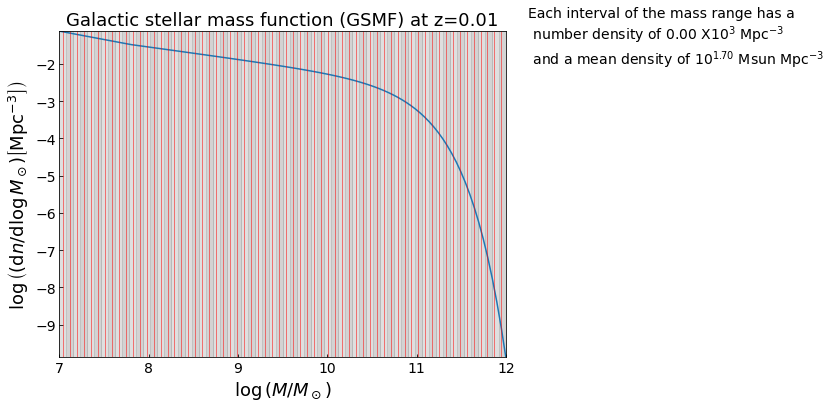

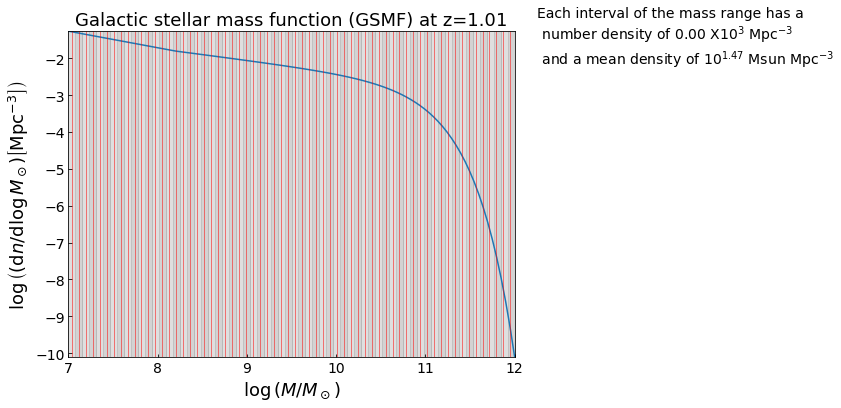

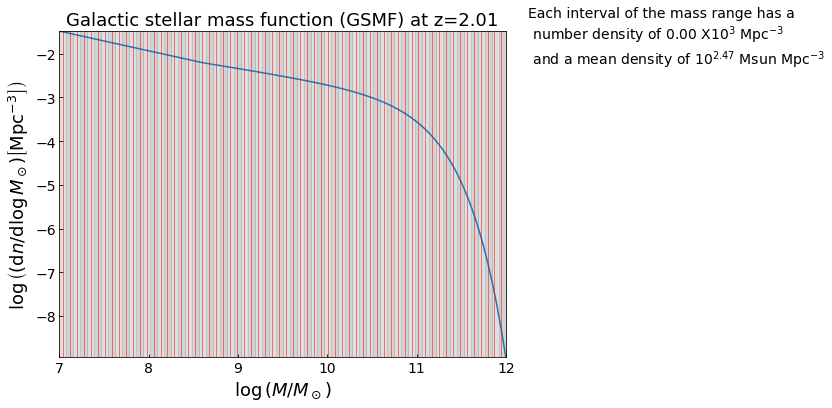

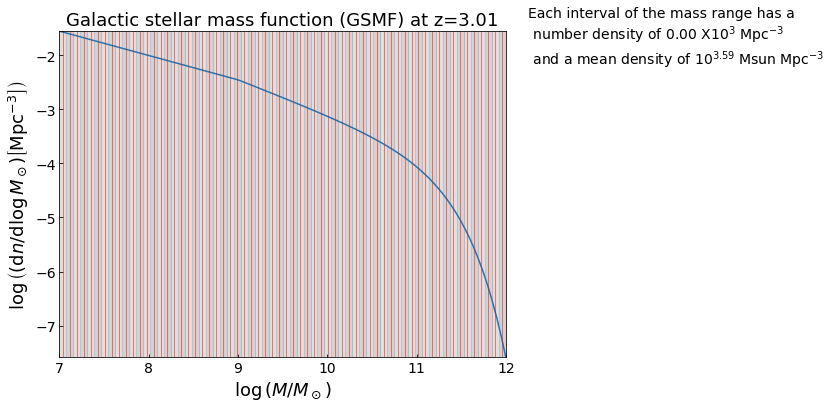

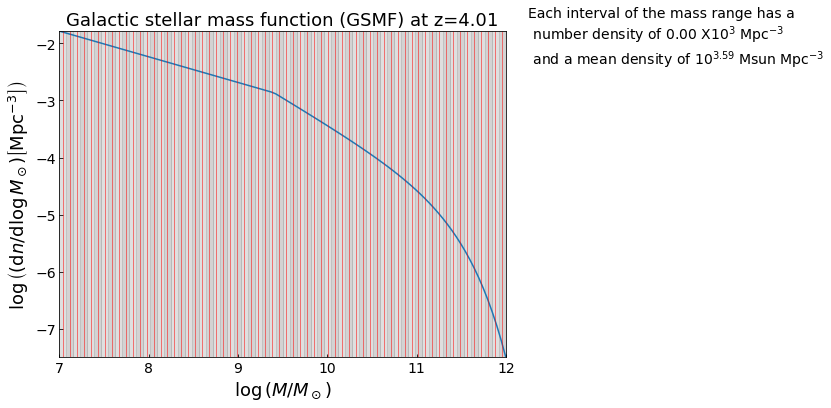

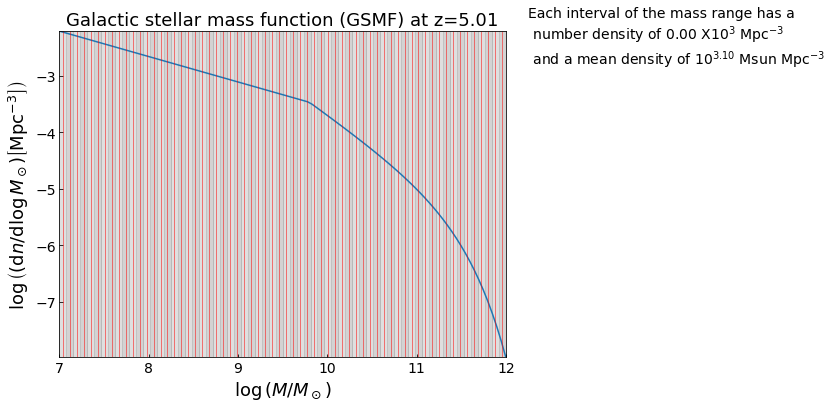

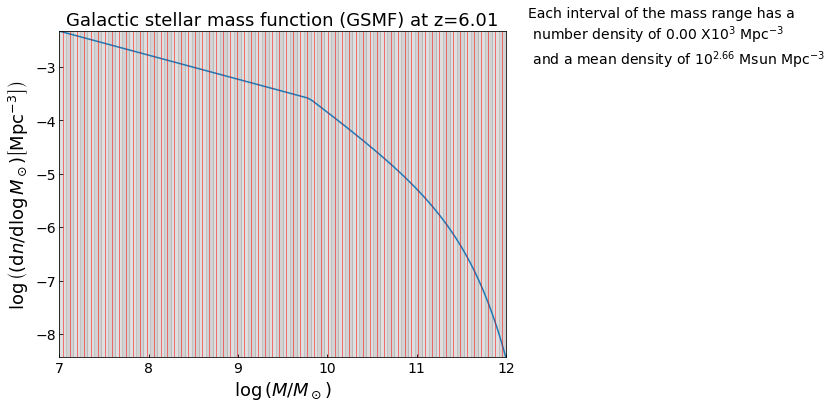

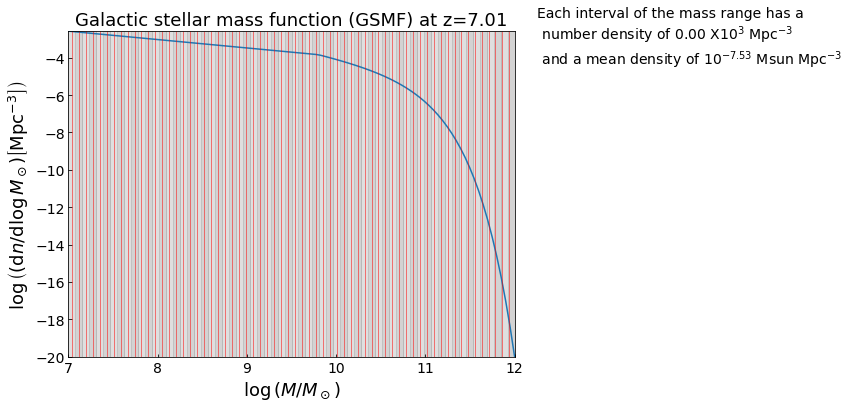

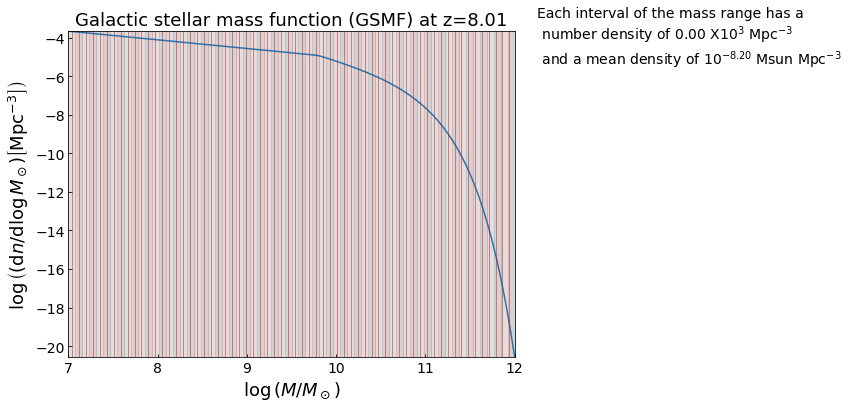

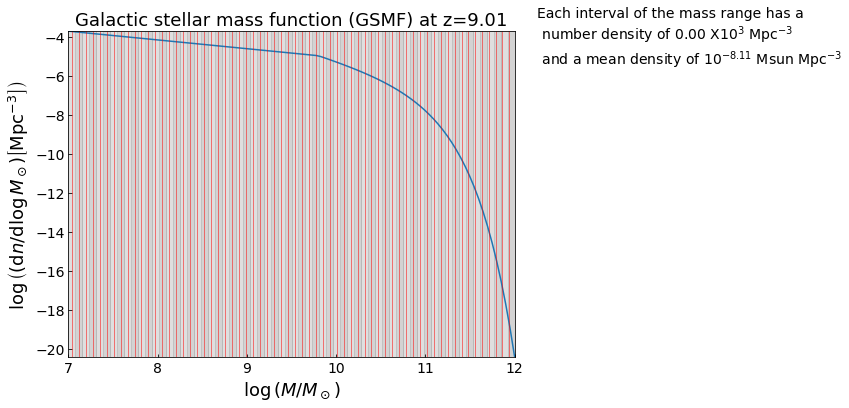

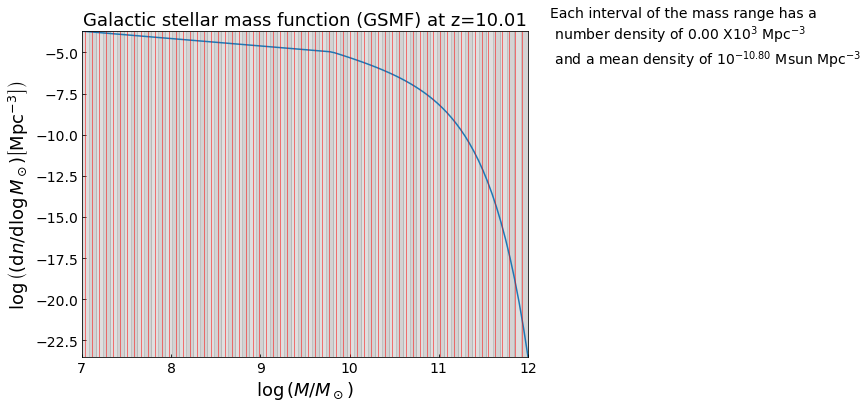

In [17]:
for module_test_z, module_test_gsmf, module_test_sampler in zip(module_test_zs, module_test_gsmf_list3, module_test_sampler_list3):
    ndensity = np.mean(module_test_sampler.grid_ndensity_array[0])
    density = np.mean(module_test_sampler.grid_density_array[0])
    bin_limits = module_test_sampler.bin_limits
    grid_masses = module_test_sampler.grid_logmasses

    testplot_logms = np.linspace(module_test_logmmin, module_test_logmmax, 100)
    testplot_gsmfs = np.array([module_test_gsmf.gsmf(logm) for logm in testplot_logms])
        
    fig, ax = plt.subplots(figsize=(8,6))

    ax.plot(testplot_logms, testplot_gsmfs)

    for i, (limit1, limit2) in enumerate(zip(bin_limits[:-1], bin_limits[1:])):
        c = 'darkgray'
        if i%2:
            c  = 'silver'
        ax.axvspan(limit1, limit2, alpha=0.5, color=c)
    
    for mass in grid_masses:
        ax.vlines(mass, testplot_gsmfs.min(), testplot_gsmfs.max(), color='r', lw=0.5)

    ax.set_xlim(module_test_logmmin, module_test_logmmax)
    ax.set_ylim(testplot_gsmfs.min(), testplot_gsmfs.max())
    ax.tick_params(axis='both', direction='in', labelsize=14)

    ax.set_xlabel(r'$\log\left(M/M_\odot\right)$', fontsize=18)
    ax.set_ylabel(r'$\log\left(\left(\mathrm{d}n/\mathrm{d}\log M_\odot\right)\left[\mathrm{Mpc}^{-3}\right]\right)$', fontsize=18)
    ax.set_title(f'Galactic stellar mass function (GSMF) at z={module_test_z}', fontsize=18)
    
    if sample_by_number_density:
        descr = 'Each interval of the mass range has a \n number density of %.2f X$10^3$ Mpc$^{-3}$ \n and a mean density of $10^{%.2f}$ Msun Mpc$^{-3}$' % (1e3*ndensity, np.log10(density))
    else:
        descr = 'Each interval of the mass range has a \n total density of $10^{%.2f}$ Msun Mpc$^{-3}$ \n and a mean number density of %.2f Msun Mpc$^{-3}$' % (np.log10(density), ndensity)
    #masses_descr = [f'$\log m_{i}/M_\odot$ = {m:.2f}' for i,m in enumerate(grid_masses)]
    #masses_str = '\n'.join(masses_descr)
    ax.text(1.05, 0.9, descr, transform=ax.transAxes, fontsize=14)
    #ax.text(1.05, 0.5, masses_str, transform=ax.transAxes, fontsize=14)
    #print(module_test_z, [np.log10(x) for x in module_test_sampler.grid_density_array])